In [1]:
import pandas as pd

In [2]:
# création d'une variable avec le chemin vers les données pour être sûre de prendre les bonnes
# pour trouver le path, on tape dans la console "!pwd"
path_to_file = "/data/home/dubois/PycharmProjects/pythonProject/cours_jedha/pandas_training"

# Lecture des données depuis le fichier csv
data = pd.read_csv(path_to_file + "/covid-19.csv")

In [3]:
data.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,1257,2020-04-23,23,4,2020,933,264,Belgium,BE,BEL,11422068.0,Europe
1,1258,2020-04-22,22,4,2020,973,170,Belgium,BE,BEL,11422068.0,Europe
2,1259,2020-04-21,21,4,2020,1487,145,Belgium,BE,BEL,11422068.0,Europe
3,1260,2020-04-20,20,4,2020,1313,230,Belgium,BE,BEL,11422068.0,Europe
4,1261,2020-04-19,19,4,2020,1045,290,Belgium,BE,BEL,11422068.0,Europe


In [4]:
# -------------------------------------
# create and manipulate columns
# ------------------------------------
# trouver l'"inflection point" (le moment où les contaminations arrêtent d'augmenter de manière exponentielle
# pour cela on calcule le growth ratio entre les nouveaux cas du jours divisés par le nombre de cas du j-1
# si le ratio est >1 ça veut dire qu'on est encore en phase d'augmentation.
# si le ratio est <1 ça veut dire qu'on est en phase de diminution

mask_us = data["geoId"] == "US"

data_us = data[mask_us]
data_us



,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
575,12137,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
576,12138,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
577,12139,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
578,12140,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
579,12141,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America
...,...,...,...,...,...,...,...,...,...,...,...,...
685,12247,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America
686,12248,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America
687,12249,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America
688,12250,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America


In [5]:
# on reset l'index pour que les lignes partent à nouveau de 0
data_us = data_us.reset_index(drop=True)
data_us.head()



,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,12137,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
1,12138,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
2,12139,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
3,12140,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
4,12141,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America


In [6]:
# pour trouver le nombre de cas cumulés, il faut d'abord créer une nouvelle colonne.
# on le fait de la même façon qu'on créerait une nouvelle clé dans un dictionnaire : new key = new column in dataframe
data_us["cumulated_cases"] = 0
data_us.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,12137,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,0
1,12138,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,0
2,12139,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,0
3,12140,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,0
4,12141,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,0


In [7]:
# ensuite, on constate que les données sont triées de la plus récente à la plus ancienne.
# pour procéder au calcul des cas cumulés, il nous faut partir de la plus ancienne à la plus récente.
# on va donc inverser l'ordre des lignes en utilisant la fonction range
# on crée une variable "total_rows" pour prendre en compte la longueur du dataframe

total_rows = len(data_us)

for i in range(total_rows-2, -1, -1):
    data_us.loc[i, "cumulated_cases"] = data_us.loc[i, "cases"] + data_us.loc[i + 1, "cumulated_cases"]

data_us

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,12137,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629
1,12138,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041
2,12139,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752
3,12140,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687
4,12141,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,12247,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
111,12248,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
112,12249,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
113,12250,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0


In [11]:
# on calcule les nouveaux cas de chaque jour dans une nouvelle colonne

data_us["new_cases"] = 0

for i in range(total_rows-2, -1, -1):
    data_us.loc[i, "new_cases"] = data_us.loc[i, "cumulated_cases"] - data_us.loc[i + 1, "cumulated_cases"]

data_us.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
0,12137,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588,0.471667
1,12138,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289,1.328666
2,12139,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065,1.140807
3,12140,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601,0.747251
4,12141,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922,1.067752


In [13]:
# on va calculer le growth ratio : new_cases du jour / new_cases du jour d'avant

data_us["growth_ratio"] = 0

for i in range(total_rows-2, -1, -1):
    data_us.loc[i, "growth_ratio"] = data_us.loc[i, "new_cases"] / data_us.loc[i + 1, "new_cases"]

data_us.head()

/tmp/ipykernel_14060/1021297497.py:6: RuntimeWarning: invalid value encountered in long_scalars
  data_us.loc[i, "growth_ratio"] = data_us.loc[i, "new_cases"] / data_us.loc[i + 1, "new_cases"]
/tmp/ipykernel_14060/1021297497.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  data_us.loc[i, "growth_ratio"] = data_us.loc[i, "new_cases"] / data_us.loc[i + 1, "new_cases"]


,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
0,12137,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588,0.471667
1,12138,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289,1.328666
2,12139,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065,1.140807
3,12140,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601,0.747251
4,12141,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922,1.067752


In [17]:
# on remet les dates dans l'ordre chronologiques
data_us = data_us.sort_values("dateRep")

# on vérifie
data_us.head()



,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
114,12251,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0.0
113,12250,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN
112,12249,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN
111,12248,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN
110,12247,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,NaN


<Axes: xlabel='dateRep'>

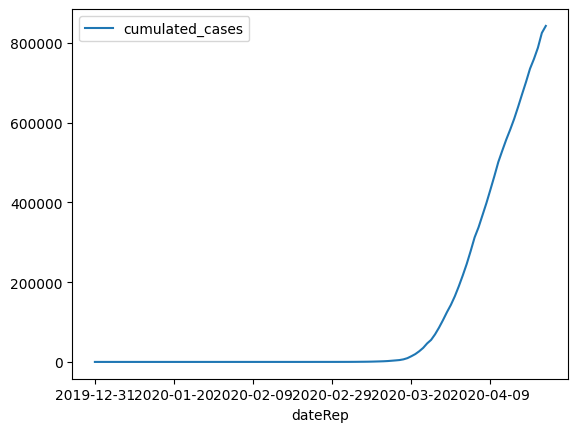

In [18]:
# datavisualisation avec pandas (cumulated cases au fil du temps)
data_us.plot.line(x="dateRep", y="cumulated_cases")

<Axes: xlabel='dateRep'>

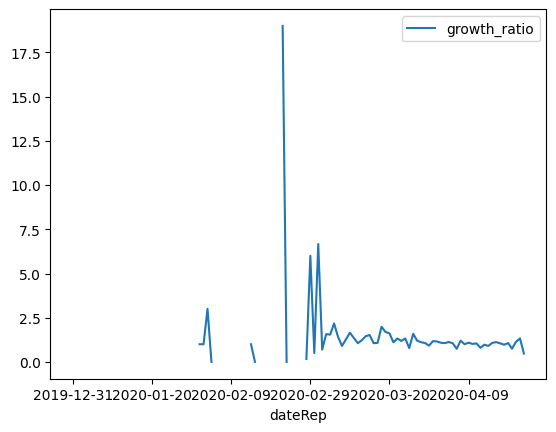

In [19]:
# datavisualisation avec pandas (évolution du growth ratio au fil du temps)
data_us.plot.line(x="dateRep", y="growth_ratio")

<Axes: xlabel='dateRep'>

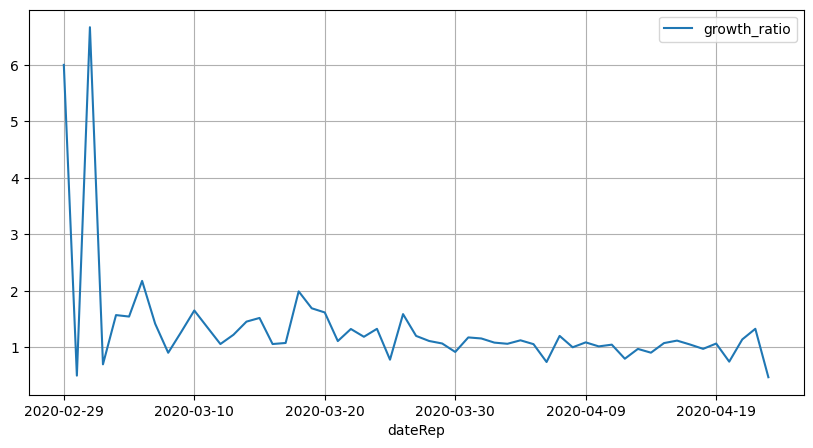

In [27]:
# on constate qu'on a un outlier. On peut s'en débarrasser dans la visualisation :
# - soit en commençant le graphique à partir de mars 2020
# - soit on peut filtrer toutes les valeurs au-dessus de 7.5

# Méthode 1 : on filtre les dates avec un mask (meilleur choix dans ce cas pour ne pas biaiser les données)
mask = data_us["dateRep"] >= "2020-02-29"
data_us[mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10, 5), grid=True)

<Axes: xlabel='dateRep'>

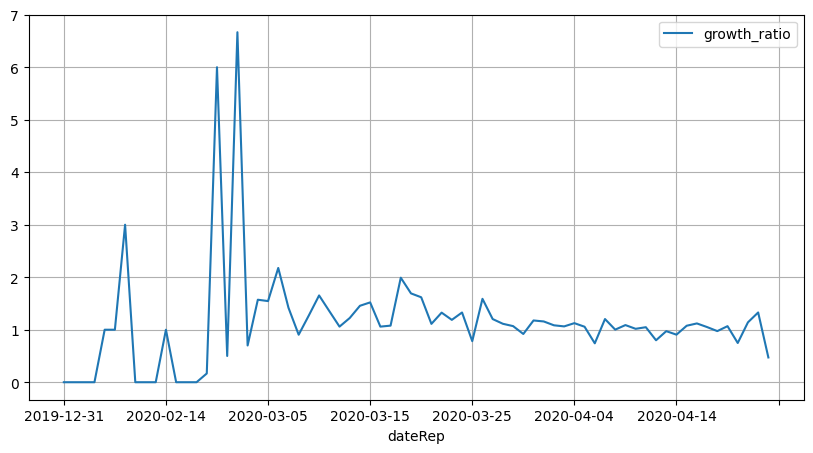

In [26]:
# Méthode 2 : on filtre toutes les valeurs > 7.5 (les données sont un peu biaisées. Préférer l'autre méthode.)

mask= data_us["growth_ratio"] <= 7.5
data_us[mask].plot.line(x="dateRep", y="growth_ratio", figsize=(10, 5), grid=True)  # avec figsize on donne hauteur et largeur

In [28]:
# write files to export our analysis
data_us.to_csv("data_us.csv")
